# Word Analysis
Check distribution and other stuff. Analyse the articles by word counts, word importances and other features!

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle
# Add functions path
import sys
sys.path.append('../Functions')
from datasets import load_stratified_dataset
from plots_fabi import *

***
### Check sites the news are from

In [2]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train_sites_unbalanced.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


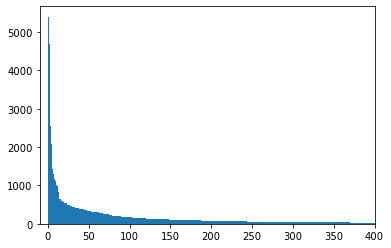

There are 1544 different publishers in the dataset!
The top five publishers are given below:
yahoo.com              : 5402
cbs8.com               : 4698
reuters.com            : 2553
travelandtourworld.com : 2076
freshnews.com          : 1418
Median: 10.0
Mean:   54.5


In [3]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

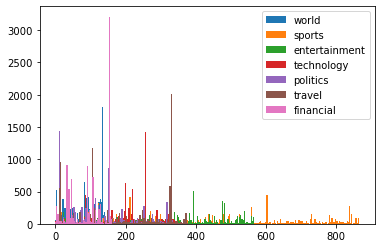

In [4]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

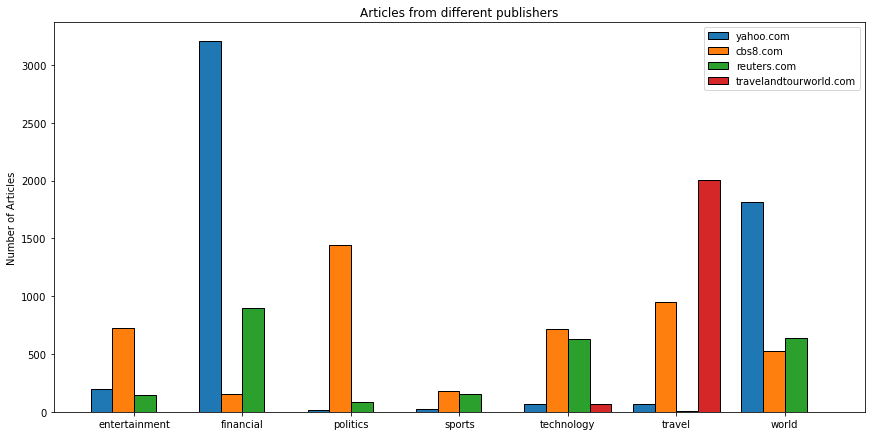

In [5]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The plots show, that most news come from few publishers, while most publishers only bring some news. Also publishers bring different amount of news in different categories, what can lead to some large bias that is introduced into the dataset. __Try to bring more balanced publishers to dataset__. (See next chapter)

***
### After balancing out the dataset

In [6]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


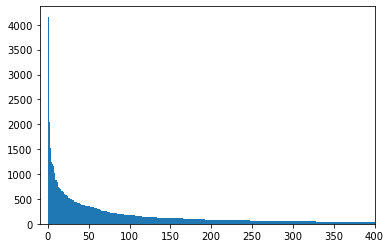

There are 1651 different publishers in the dataset!
The top five publishers are given below:
cbs8.com               : 4162
reuters.com            : 2054
yahoo.com              : 1514
usnews.com             : 1247
prweb.com              : 1197
Median: 14.0
Mean:   51.0


In [7]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

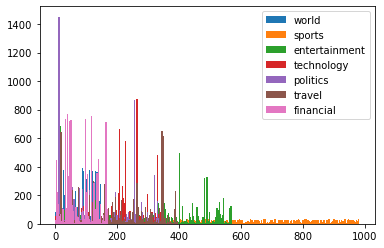

In [8]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

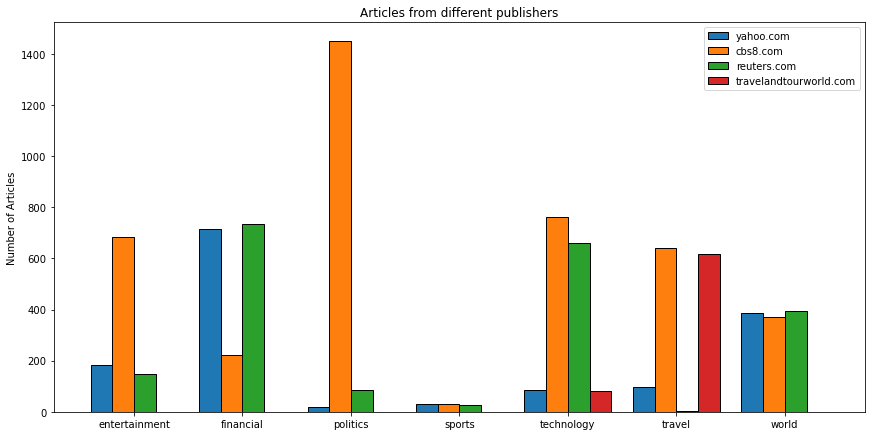

In [9]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The median rised from 10 to 14. Categories are better balanced over publishers, but still there is a bias inside. Try with less data.

***
### After balancing out the dataset (small dataset)

In [10]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train_small.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 2619 samples!


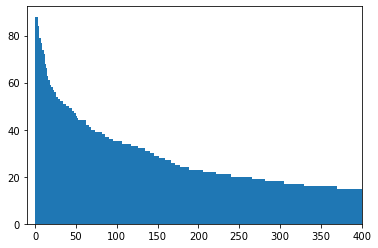

There are 1709 different publishers in the dataset!
The top five publishers are given below:
indiatimes.com         : 88
cbs8.com               : 88
yahoo.com              : 85
reuters.com            : 84
thetimes.co.uk         : 79
Median: 7.0
Mean:   10.7


In [11]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

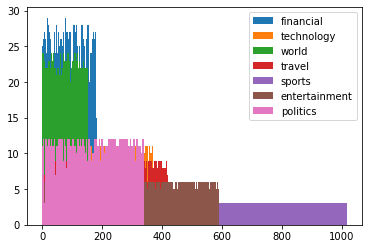

In [12]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

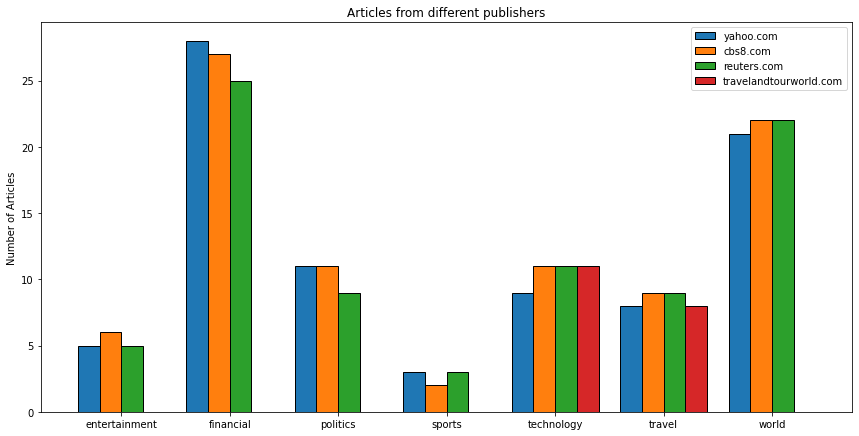

In [13]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The dataset is small, but very well distributed!

***
### SVC different categories

In [14]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


In [15]:
# Load training set
#df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=2000)
# Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)
mid = int(df.shape[0]/2)
X_train, y_train = df[:mid].text, df[:mid].category

# Load test set for every category
df = df[mid:]
test_set = {}
for i in df.category.unique():
    test_set[i] = df[df['category'] == i].text.values

In [16]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                            ngram_range=(1,2), stop_words='english')
# Fit model
clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=0.4)
X_train_tfidf = tfidf.fit_transform(X_train)
clf.fit(X_train_tfidf, y_train)

predictions = []
# Get accuracies for categories
for key, value in test_set.items():
    X_test_tfidf = tfidf.transform(value)
    y_test = np.full(value.shape[0], key)
    print('Score for category {: <13}:   {:.1f} %'.format(key, clf.score(X_test_tfidf, y_test)*100))
    # Get Predictions
    cat, val = np.unique(clf.predict(X_test_tfidf), return_counts=True)
    #pred = sorted(list(zip(cat, (val/y_test.shape[0]*100).round(1))) , key=lambda x: x[1], reverse=True)
    predictions.append((cat, (val/y_test.shape[0]*100).round(1)))

Score for category sports       :   89.4 %
Score for category financial    :   81.4 %
Score for category technology   :   80.8 %
Score for category travel       :   81.2 %
Score for category entertainment:   81.2 %
Score for category world        :   74.6 %
Score for category politics     :   72.1 %


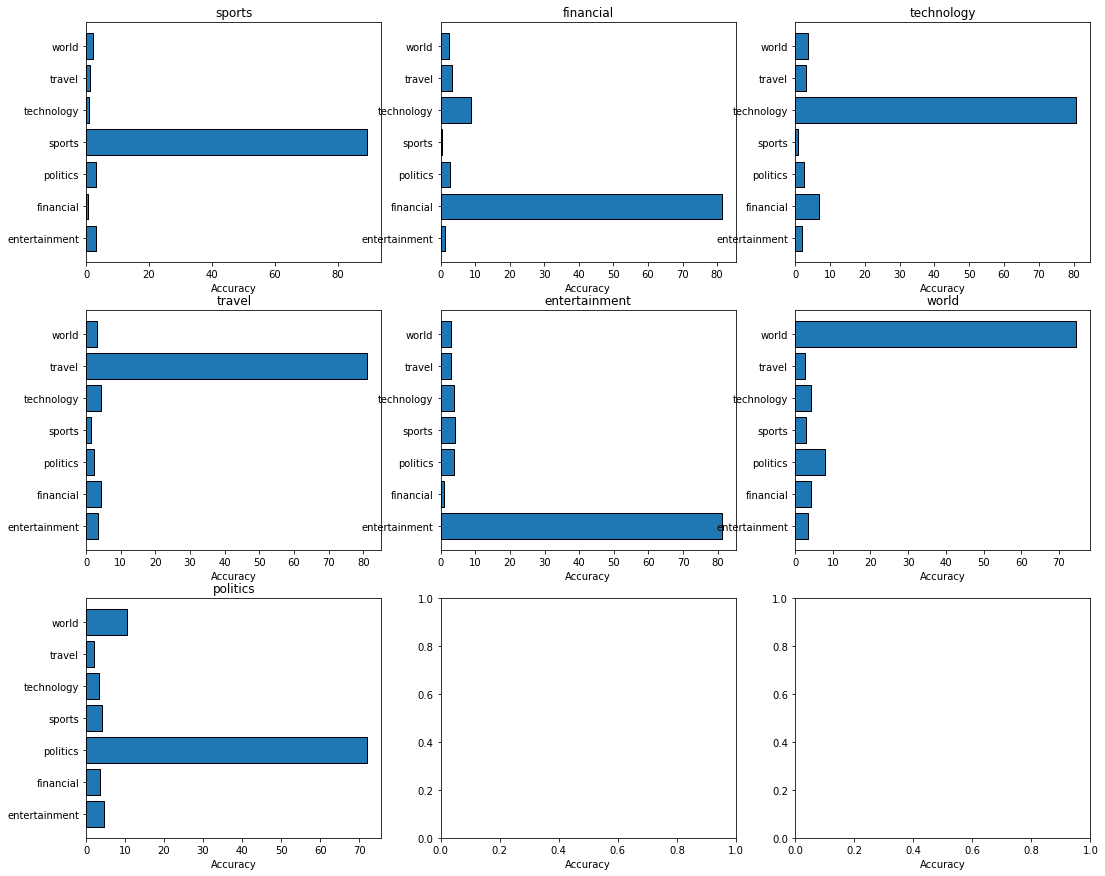

In [17]:
fig, ax = plt.subplots(3,3,figsize=(18,15))
simple_h_bar(predictions[0][0], predictions[0][1], ax=ax[0][0], title=predictions[0][0][np.argmax(predictions[0][1])])
simple_h_bar(predictions[1][0], predictions[1][1], ax=ax[0][1], title=predictions[1][0][np.argmax(predictions[1][1])])
simple_h_bar(predictions[2][0], predictions[2][1], ax=ax[0][2], title=predictions[2][0][np.argmax(predictions[2][1])])
simple_h_bar(predictions[3][0], predictions[3][1], ax=ax[1][0], title=predictions[3][0][np.argmax(predictions[3][1])])
simple_h_bar(predictions[4][0], predictions[4][1], ax=ax[1][1], title=predictions[4][0][np.argmax(predictions[4][1])])
simple_h_bar(predictions[5][0], predictions[5][1], ax=ax[1][2], title=predictions[5][0][np.argmax(predictions[5][1])])
simple_h_bar(predictions[6][0], predictions[6][1], ax=ax[2][0], title=predictions[6][0][np.argmax(predictions[6][1])])

for a1 in ax:
    for a2 in a1:
        a2.set_xlabel('Accuracy')

***
All categories seem to be predicted equally well, except politics and world. Both are most false predicted in each other. Categories are most probably too close together, hard to separate.

***
## Word probabilities
Calculate the count of each word in each article.\
Then use naive bayes to get the probability of a word to be in a class (category).

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text = df.text_lem.values
# Number of times the words have to occur at least
min_df=20

# ngram_range only use 1 word, stop_words=english remove common words(eg: a, an, the)
# CountVectorizer ignores difference between lower and upper case and puncuation
vect = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=min_df)

# CountVectorizer converts list of strings to matrix with: rows = observation, columns = terms in text, values=count/document
X = vect.fit_transform(text)
words = vect.get_feature_names()


# Turn result to dummies, so that columns are in correct order
d = {}
count=0
for i in df.category.unique():
    d[i] = count
    count += 1
df['category_num'] = [d[i] for i in df.category]

y = df.category_num

# Remove alpha to prevent bias
clf = MultinomialNB(alpha=1.e-10)
clf.fit(X,y)

# Get logarithmic probabilities, save in dataframe
likelihood_df_raw = pd.DataFrame(clf.feature_log_prob_.transpose(),columns=df.category.unique(), index=words)

***
## Word importances for every category
Calculate the word importances for each category by difference of probability of a word in one category to the probability of the word in each other category.

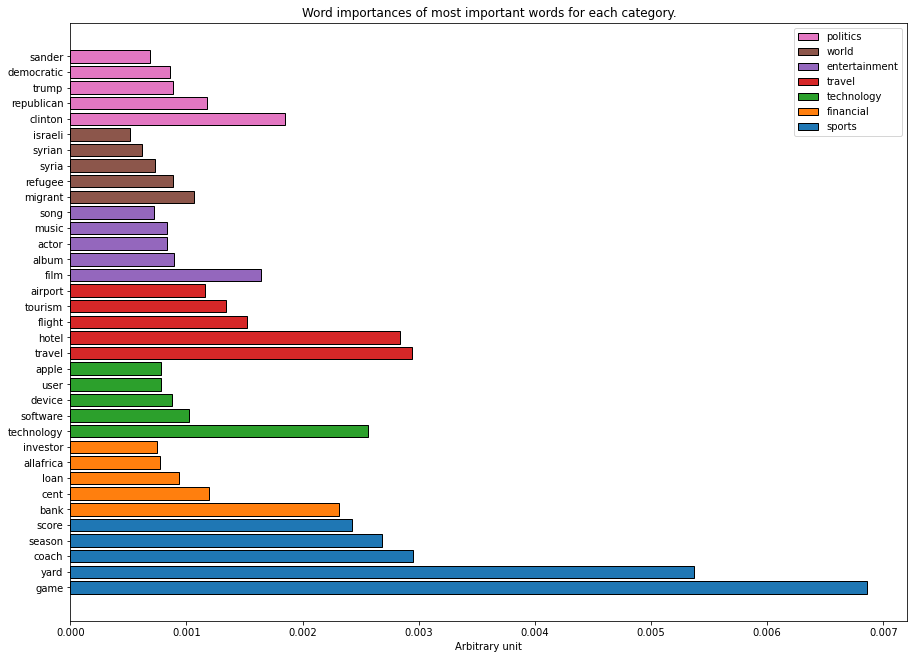

In [19]:
num_words = 5 # num_words
fig = plt.figure(figsize=(15,11))
ax = plt.subplot(111)
likelihood_df = {}
for category in df.category.unique():
    # Get probability of words in one category - probability in all other categories
    likelihood_df[category] = np.exp(likelihood_df_raw[category]) - np.sum(np.exp(likelihood_df_raw.drop(category, axis=1)), axis=1)
    
    # Sort likelihood
    likelihood_df[category] = likelihood_df[category].sort_values(ascending=False)

    # Get top likely words
    top = likelihood_df[category][:num_words]
    
    ax.barh(top.index, top, edgecolor='black', label=category)

ax.set_title('Word importances of most important words for each category.')
ax.set_xlabel('Arbitrary unit')
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1]);

***
## Word embedding
Save Word embeddings with different vocabulary words and sizes.

In [20]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim

#### Create, fit and save embedding vectors

In [21]:
# Embedding dimension
emb_dims = []
# Vocabulary size
vocab_sizes = [30]

for vocab_size in vocab_sizes:
    # Get vocabulary
    vocabulary = set()
    for category in likelihood_df.keys():
        vocabulary.update(likelihood_df[category].index[:vocab_size])
    vocabulary = list(vocabulary)

    for emb_dim in emb_dims:

        # Name of embedding
        name = 'voc_' + str(len(vocabulary)) + '_dim_' + str(emb_dim)

        # Size is embedding dimension
        model = Word2Vec(size=emb_dim, max_vocab_size=10000, window=5, min_count=1, workers=1)
        # Set vocabulary
        model.build_vocab(sentences=[vocabulary])
        # Train model on lemmatized articles
        model.train(df.text_lem, total_examples=1, epochs=model.epochs)
        # Create word vectors
        word_vectors = model.wv
        # Save Word vectors
        word_vectors.save('word_embeddings/word2vec/full_test/' + name + '.word_vectors')
        # Get sizes
        print('Embedding vectors represent {} vocabularies using {} embedding dimensions!'.format(len(word_vectors.vocab), word_vectors.vector_size))

In [22]:
#word_vectors.most_similar('str')

***
## Look at failed examples

In [14]:
df_test = pd.read_csv('../Datasets/dataset_categories/dataset_categories_test.csv')
df_test.shape

(3500, 8)

In [4]:
X = df_test.text_lem
y = df_test.category

In [5]:
from categorizer import Categorizer
categorizer = Categorizer()

In [6]:
y_pred = categorizer.pred(X)

In [10]:
(y_pred == y).sum()/y.shape[0]

0.816

In [12]:
df_wrong = df_test[(y_pred != y)]

In [13]:
df_wrong.shape

(644, 8)

In [29]:
categorizer = Categorizer(show_words=True)

In [33]:
pd.set_option('display.max_colwidth', -1)
print(categorizer.pred(df_wrong.text_lem.values[0]))
df_wrong.iloc[[0]].loc[:, ['title', 'text', 'category']]

(array(['world'], dtype=object), [['ap', 'police', 'die', 'woman', 'report']])


,title,text,category
2,"Authorities: 1 killed, 3 wounded in Tennessee State shooting","By ERIK SCHELZIG\nAssociated Press NASHVILLE, Tenn. (AP) - One man was killed and three women were wounded in an on-campus shooting stemming from a fight over a dice game on the campus of Tennessee State University, police said Friday.\nThe 19-year-old who died in the Thursday night shooting was not enrolled at the school, police spokesman Don Aaron said. It wasn't known whether the shooter, who fled the scene, was a student.\nThe shooting occurred in a courtyard around 10:50 p.m. Witnesses said an argument over the dice game boiled over into a fistfight when ""suddenly shots were fired,"" Aaron said.\nThree female students whom Aaron described as ""innocent passers-by"" were struck during the shooting. One was grazed and didn't require medical attention, while two others were taken to Vanderbilt University Medical Center with injuries. One had been released by Friday morning, while the other was in stable condition and was expected to make a full recovery, Aaron said.\n""This was an isolated shooting incident in a courtyard,"" Aaron said. ""There were never, we believe, any other students in danger in dormitories or elsewhere on campus.""\nSeveral students used their phones to record the fight. Police have obtained some video, but encouraged other students who scattered when the shooting began to come forward with further recordings and information.\n""The person who fired those shots put innocent persons in extreme danger in this isolated incident,"" Aaron said. ""We're hoping that TSU students that have this video, have this knowledge, understand that this person put them in danger tonight, and will report what they know.""\nPolice did not yet have a description of the suspect, and could not say whether an exchange of gunfire occurred until the evidence is analyzed.\nPolice expected to complete their crime scene investigation Friday morning and allow the campus to return to normal operations. They planned to release the identity of the man who died later in the day.\nThe incident comes just over a week after three people were wounded by gunfire at an off-campus party across the street from the college.\n",politics


In [36]:
pd.set_option('display.max_colwidth', -1)
print(categorizer.pred(df_wrong.text_lem.values[100]))
df_wrong.iloc[[100]].loc[:, ['title', 'text', 'category']]

(array(['technology'], dtype=object), [['technology', 'tech', 'software', 'company', 'district court']])


,title,text,category
419,Jury awards Oracle $50M in copyright dispute with Vegas firm,"US jury awards $50M to Oracle in copyright fight with Las Vegas firm; tech giant sought $246M 41 p.m. EDT + More LAS VEGAS (AP) — A federal court jury in Nevada has ordered a Las Vegas-based software maintenance firm and its chief executive to pay $50 million to technology giant Oracle International Corp. in a copyright infringement lawsuit.\nOracle had sought nearly $246 million.\nThe verdict Tuesday against Las Vegas-based Rimini Street Inc. followed a two-week trial in U.S. District Court in Las Vegas.\nIt focused on copies of J.D. Edwards and Siebel software.\nStatements on Friday from the two companies showed the fight isn't over.\nOracle says it will seek a court order barring Rimini Street from continuing to engage in intellectual property theft.\nA Rimini Street statement says the jury found the company liable only for ""innocent"" — not ""willful"" — property right infringement.\nIt calls Oracle's claim that it constituted IP theft defamatory.\n",politics


In [37]:
pd.set_option('display.max_colwidth', -1)
print(categorizer.pred(df_wrong.text_lem.values[300]))
df_wrong.iloc[[300]].loc[:, ['title', 'text', 'category']]

(array(['world'], dtype=object), [['upi', 'capture', 'deputy', 'appear', 'man']])


,title,text,category
1698,"Hawk, falcon duel over dove in Arizona living room | Weird News","CAVE CREEK, Ariz. (UPI) -- A man visiting his sick father in Arizona said a night of watching football took a bizarre turn when a hawk and falcon fought over a dove in the living room.\nTrent Davis said he was visiting his father in Cave Creek, Ariz., Sunday and he was helping the older man, who has cancer, out of bed when he heard a loud noise from the living room.\n""I finished what I was doing there, came back in here and then right here in this corner of the room there was a falcon,"" Davis told KPNX-TV. And a big eagle, which I can show pictures of. In between was a dove or something that had flown in and they were fighting over it in the living room.\nThe Maricopa County Sheriff's Office said the animal Davis identified as an eagle appears to have actually been a hawk.\nDavis, who said the birds must have entered through an open door, attempted to shoo the birds out with a broom.\n""I put on a leather jacket and sweat pants and flip flops and got a broom,"" Davis said. The eagle did its full on defense stance and kind of flew at me with the feet out like this so I kind of ran away like any smart person would.\nDavis called 911 and deputies soon arrived to capture the birds of prey in bedsheets and release them outside.\n""The one night I'm supposed to watch my dad and then a hawk attacks my dad, I'm gonna be in trouble with my mom,"" Davis joked.\nA Missouri man faced a similar challenge in February of this year when a red-tailed hawk crashed through his bedroom window.\nDrew Arnold, 23, of Kansas City, said the bird crashed ""through two panes of glass"" and destroyed my bedroom.\nAn animal control officer removed the exhausted hawk from Arnold's home, but not before he caught an image of the hawk's ""smile"" on camera.",entertainment


In [39]:
pd.set_option('display.max_colwidth', -1)
print(categorizer.pred(df_wrong.text_lem.values[150]))
df_wrong.iloc[[150]].loc[:, ['title', 'text', 'category']]

(array(['politics'], dtype=object), [['writer', 'press', 'ap', 'people', 'care']])


,title,text,category
647,3 arrested in killing of California tantra yoga teacher,"By SUDHIN THANAWALA and PAUL ELIAS\nAssociated Press SAN RAFAEL, Calif. (AP) - Three drifters were arrested Wednesday in Oregon in the killing of a beloved California teacher of tantra yoga who was shot dead while walking his dog along a scenic hiking trail, authorities said.\nThe suspects - two men and a woman - were arrested in Portland outside a community dining hall and were in possession of the victim's car, Marin County sheriff's Lt. Doug Pittman said.\nThe arrest came two days after the body of Steve Carter, 67, was found on a trail in upscale Marin County, where he was living and caring for his cancer-stricken wife Lokita Carter.\nPittman said the trio was tracked to Oregon - more than 600 miles to the north - by detectives using GPS technology in the victim's car and hundreds of tips from people who thought they looked suspicious.\nAuthorities were also aided by surveillance footage from a gas station in Point Reyes that showed the suspects with the stolen car about a half-hour after the slaying, Pittman said.\n""So many people are in possession of cameras in cars, homes, businesses,"" he said. ""Those types of systems became crucial to the pursuit and apprehension.""\nMark Reano, owner of Greenbridge Gas & Auto in Point Reyes, said authorities came to the station early Wednesday for the video.\n""They grabbed it and went,"" said Reano, who did not see the suspects.\nAuthorities have not provided a motive for the attack and said it did not appear the suspects knew the victim. Pittman said it was unclear if Carter might have been targeted for his car or other belongings.\nMarin County sheriff's Capt. Dave Augustus described the suspects as drifters. Their names were not immediately released.\n""We're not even sure who these people are right now,"" Pittman said.\nAuthorities believe Carter drove to the trail near Fairfax in his 2003 Volkswagen that was missing after the attack.\nFollowers credited Carter with improving their romantic relationships by teaching tantra, a philosophy of meditation, yoga and sexuality famously embraced by rock star Sting.\nStunned students and supporters mourned their beloved teacher who was shot multiple times and was still holding the leash of his wounded Doberman pinscher when he was found. The dog is expected to recover.\nThe Carters launched the Ecstatic Living Institute in rural Middletown, California, about 16 years ago to teach tantra to couples around the world. They held workshops nearby at the clothing-optional Harbin Hot Springs, which was destroyed last month in a wildfire.\n""He was my mentor,"" said Greg Whitmore, 37, a firefighter who attended several weeklong retreats led by the Carters. ""It was intoxicating. People wanted to be around him.""\nLast year, the couple turned the institute over to a former student, Logan Rose, and moved to Costa Rica in semi-retirement, teaching an occasional class. But soon after moving, Lokita was diagnosed with breast cancer.\n""It has been a very traumatic season for us with Lokita's cancer, then the Valley Fire that destroyed our beloved Harbin Hot Springs,"" Rose said.\n""This is the most devastating blow,"" Rose said of the homicide. ""We are heartbroken.""\nLokita Carter didn't respond to requests for comment.\nJoya Petra Gallasch said Carter was responsible for adding her new first name during a training session at Harbin Hot Springs. She was depressed at the time and Carter led her to adopt the new first name of Joya, Gallasch said.\n""I've always been a super joyous person,"" Gallasch said. ""He knew intuitively that it was time to get a new name. He exuded a form of brilliance.""\nA hiker found Carter's body less than an hour after deputies responded to a report of shots fired and didn't see anything suspicious.\nCarter's brother, Michael Carter, said he knew of no one who disliked his brother.\n""I can't imagine that it's anything other than a random 

***
It can be seen, that most categories are not wrongly classified, but fit more than one category well. So here the biggest problem is not the model, but the data that is wrongly labeled or labeled in a too linear fashion
***